# **Question 1**

Scale of each chessblock = 28x28mm

1. For the given image calib-object.jpg , use any 20-30 different points on different planes and perform the Direct Linear Transform (DLT) based calibration as discussed in class. Note that you need to manually estimate the image co-ordinates of the given world points and refer to calib-object-legend jpg for world measurements

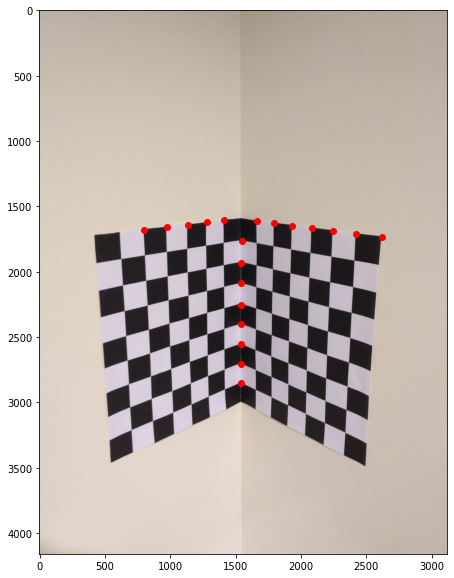

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random
img_point= np.array([[1663,1614],[1794,1630],[1932,1648],[2083,1666],[2247,1687],[2421,1710],[2619,1733],[1546,1764],[1545,1931],[1544,2089],[1543,2252],[1543,2403],[1545,2557],[1545,2706],[1545,2853],[1410,1608],[1281,1624],[1134,1642],[975,1660],[800,1678]])
img = mpimg.imread('../calibration-data/calib-object.jpg')
plt.figure(figsize = [10,10])
imgplot = plt.imshow(img)
for i,j in img_point: 
  plt.plot(i,j,'ro')
plt.show()

(a) Scale of each chessblock = 28x28mm

In [ ]:
w=28
world_point= np.array([[w,0,0],[w*2,0,0],[w*3,0,0],[w*4,0,0],[w*5,0,0],[w*6,0,0],[w*7,0,0],[0,w,0],[0,w*2,0],[0,w*3,0],[0,w*4,0],[0,w*5,0],[0,w*6,0],[0,w*7,0],[0,w*8,0],[0,0,w],[0,0,w*2],[0,0,w*3],[0,0,w*4],[0,0,w*5]])

Perform these three experiments, report the projection matrix and reconstruction error, for both the above mentioned scales:

(a) Use original data points as input. Perform reconstruction on the original data points.

In [ ]:
def_point=img_point.shape[0]
A_mat=[]
for i in range(def_point):
  x=world_point[i][0]
  y=world_point[i][1]
  z=world_point[i][2]
  u=img_point[i][0]
  v=img_point[i][1]
  A_mat.append([x,y,z,1,0,0,0,0,-u*x,-u*y,-u*z,-u])
  A_mat.append([0,0,0,0,x,y,z,1,-v*x,-v*y,-v*z,-v])
A_mat=np.asarray(A_mat)
u,s,v=np.linalg.svd(A_mat)
P = v[-1,:]/v[-1,-1]
P = P.reshape(3,4)
one=np.ones([1,world_point.shape[0]])
x=np.concatenate((world_point.T,one))
x=np.dot(P,x)
x=x/x[2,:]
error=np.sqrt(np.mean(np.sum((x[0:2,:].T-img_point)**2,1)))
print("Reconstruction error: ",error)
print("Projection matrix\n",P)

Reconstruction error:  2.2878473214861152
Projection matrix
 [[ 2.25308716e+00  5.70020438e-01 -6.29642661e+00  1.54285936e+03]
 [-1.43724289e+00  6.64128247e+00 -1.51419028e+00  1.59684199e+03]
 [-1.23363624e-03  3.62582768e-04 -1.24707037e-03  1.00000000e+00]]


(b) Use normalized data points as input.
Perform reconstruction on the normalized data points (without denormalizing the projection matrix obtained)

In [ ]:
def Normalization(X):
  m =np.mean(X,0)
  s= np.std(X)
  X=X.copy()
  if X.shape[1] == 2:
    xT=np.array([[s,0,m[0]],[0,s,m[1]],[0,0,1]])
  else:  
    xT=np.array([[s,0,0,m[0]],[0,s,0,m[1]],[0,0,s,m[2]],[0,0,0,1]])
  xT=np.linalg.inv(xT)
  X=np.dot(xT,np.concatenate((X.T,np.ones((1,X.shape[0])))))
  X =X[0:3,:].T
  return xT,X

In [ ]:
def_point=img_point.shape[0]
A_mat=[]
xT,world_point_n=Normalization(world_point)
yT,img_point_n=Normalization(img_point)
for i in range(def_point):
  x=world_point_n[i][0]
  y=world_point_n[i][1]
  z=world_point_n[i][2]
  u=img_point_n[i][0]
  v=img_point_n[i][1]
  A_mat.append([x,y,z,1,0,0,0,0,-u*x,-u*y,-u*z,-u])
  A_mat.append([0,0,0,0,x,y,z,1,-v*x,-v*y,-v*z,-v])
A_mat=np.asarray(A_mat)
u,s,v=np.linalg.svd(A_mat)
P = v[-1,:]/v[-1,-1]
P = P.reshape(3,4)
one=np.ones([1,world_point_n.shape[0]])
x=np.concatenate((world_point_n.T,one))
x=np.dot(P,x)
x=x/x[2,:]
x[0:2,:].T.shape
img_point_n.shape
error=np.sqrt(np.mean(np.sum((x[0:2,:].T-img_point_n[:,:-1])**2,1)))
print("Reconstruction error: ",error)
print("Projection matrix\n",P)

Reconstruction error:  0.005166631044136181
Projection matrix
 [[ 0.63411103 -0.00344054 -0.63214841 -0.03835502]
 [ 0.13879944  0.88258627  0.13115876  0.06906968]
 [-0.08110562  0.02392317 -0.08187038  1.        ]]


(c) Use normalized data points as input. Perform reconstruction on the original data points (with the denormalized projection matrix).

In [ ]:
def_point=img_point.shape[0]
A_mat=[]
xT,world_point_n=Normalization(world_point)
yT,img_point_n=Normalization(img_point)
for i in range(def_point):
  x=world_point_n[i][0]
  y=world_point_n[i][1]
  z=world_point_n[i][2]
  u=img_point_n[i][0]
  v=img_point_n[i][1]
  A_mat.append([x,y,z,1,0,0,0,0,-u*x,-u*y,-u*z,-u])
  A_mat.append([0,0,0,0,x,y,z,1,-v*x,-v*y,-v*z,-v])
A_mat=np.asarray(A_mat)
u,s,v=np.linalg.svd(A_mat)
P = v[-1,:]/v[-1,-1]
P = P.reshape(3,4)
P = np.dot(np.dot(np.linalg.pinv(yT), P),xT)
P = P / P[-1,-1]
one=np.ones([1,world_point.shape[0]])
x=np.concatenate((world_point.T,one))
x=np.dot(P,x)
x=x/x[2,:]
x[0:2,:].T.shape
img_point_n.shape
error=np.sqrt(np.mean(np.sum((x[0:2,:].T-img_point)**2,1)))
print("Reconstruction error: ",error)
print("Projection matrix\n",P)

Reconstruction error:  2.2892585834884653
Projection matrix
 [[ 2.25453542e+00  5.71747097e-01 -6.29421457e+00  1.54285915e+03]
 [-1.43584665e+00  6.64455160e+00 -1.50967036e+00  1.59679047e+03]
 [-1.23303733e-03  3.63700537e-04 -1.24466383e-03  1.00000000e+00]]


2. Decompose the projection matrix obtained for the main experiment above and report:

  (a) camera matrix (K)

  (b) rotation matrix (R)
  
  (c) projection center (C)

In [ ]:
def_point=img_point.shape[0]
A_mat=[]
for i in range(def_point):
  x=world_point[i][0]
  y=world_point[i][1]
  z=world_point[i][2]
  u=img_point[i][0]
  v=img_point[i][1]
  A_mat.append([x,y,z,1,0,0,0,0,-u*x,-u*y,-u*z,-u])
  A_mat.append([0,0,0,0,x,y,z,1,-v*x,-v*y,-v*z,-v])
A_mat=np.asarray(A_mat)
u,s,v=np.linalg.svd(A_mat)
P = v[-1,:]/v[-1,-1]
P = P.reshape(3,4)
one=np.ones([1,world_point.shape[0]])
x=np.concatenate((world_point.T,one))
x=np.dot(P,x)
x=x/x[2,:]
tmp= P[:,3]*-1
tmp1=P[:,0:3]
p=np.linalg.pinv(tmp1)
C=np.dot(p,tmp)
R,K=np.linalg.qr(tmp1)
error=np.sqrt(np.mean(np.sum((x[0:2,:].T-img_point)**2,1)))
print("Reconstruction error: ",error)
print("Projection matrix\n",P)
print("camera matrix (K)\n",K)
print("Rotation matrix (R)\n",R)
print("Projection center (C)\n",C)

Reconstruction error:  2.2878473214861152
Projection matrix
 [[ 2.25308716e+00  5.70020438e-01 -6.29642661e+00  1.54285936e+03]
 [-1.43724289e+00  6.64128247e+00 -1.51419028e+00  1.59684199e+03]
 [-1.23363624e-03  3.62582768e-04 -1.24707037e-03  1.00000000e+00]]
camera matrix (K)
 [[-2.67246523e+00  3.09109007e+00  4.49402936e+00]
 [ 0.00000000e+00 -5.90565140e+00  4.66277221e+00]
 [ 0.00000000e+00  0.00000000e+00 -4.16186674e-03]]
Rotation matrix (R)
 [[-8.43074453e-01 -5.37796645e-01  4.86091258e-04]
 [ 5.37796666e-01 -8.43074573e-01 -9.63164386e-05]
 [ 4.61609838e-04  1.80216330e-04  9.99999877e-01]]
Projection center (C)
 [403.61666697 -65.65317112 383.52217667]


3. (a) Implement the RANSAC based variant of the above calibration method and report your observations for main experiment.

In [ ]:
def DLT(world_point,img_point):
  def_point=img_point.shape[0]
  A_mat=[]
  xT,world_point_n=Normalization(world_point)
  yT,img_point_n=Normalization(img_point)
  for i in range(def_point):
    x=world_point_n[i][0]
    y=world_point_n[i][1]
    z=world_point_n[i][2]
    u=img_point_n[i][0]
    v=img_point_n[i][1]
    A_mat.append([x,y,z,1,0,0,0,0,-u*x,-u*y,-u*z,-u])
    A_mat.append([0,0,0,0,x,y,z,1,-v*x,-v*y,-v*z,-v])
  A_mat=np.asarray(A_mat)
  u,s,v=np.linalg.svd(A_mat)
  P = v[-1,:]/v[-1,-1]
  P = P.reshape(3,4)
  P = np.dot(np.dot(np.linalg.pinv(yT), P),xT)
  P = P / P[-1,-1]
  one=np.ones([1,world_point.shape[0]])
  x=np.concatenate((world_point.T,one))
  x=np.dot(P,x)
  x=x/x[2,:]
  x[0:2,:].T.shape
  img_point_n.shape
  tmp= P[:,3]*-1
  tmp1=P[:,0:3]
  p=np.linalg.pinv(tmp1)
  C=np.dot(p,tmp)
  R,K=np.linalg.qr(tmp1)
  error=np.sqrt(np.mean(np.sum((x[0:2,:].T-img_point)**2,1)))
  return P,error,C,R,K

In [ ]:
min_ = -1
best_w=0
best_i=0
best_P=0
best_C=0
best_K=0
best_R=0
for i in range(50):
  rand_p=random.sample(range(19),12)
  new_w=[]
  new_i=[]
  for j in rand_p:
    new_w.append(world_point[j])
    new_i.append(img_point[j])
  new_w=np.array(new_w)
  new_i=np.array(new_i)
  P,error,C,R,K=DLT(new_w,new_i)
  if(min_==-1):
    min_=error
    best_w=new_w
    best_i=new_i
    best_P=P
    best_C=C
    best_K=K
    best_R=R
  elif min_>error:
    min_=error
    best_w=new_w
    best_i=new_i
    best_P=P
    best_C=C
    best_K=K
    best_R=R
  print("Reconstruction error: ",error)
print("Projection matrix\n",best_P)
print("camera matrix (K)\n",K)
print("Rotation matrix (R)\n",R)
print("Projection center (C)\n",C)

Reconstruction error:  1.3297241733955778
Reconstruction error:  1.3846763566314098
Reconstruction error:  2.4752056145876256
Reconstruction error:  1.4509443977250764
Reconstruction error:  25.97743224171029
Reconstruction error:  1.238004969081911
Reconstruction error:  2.1412420036954467
Reconstruction error:  2.280726178018972
Reconstruction error:  19.741143429312498
Reconstruction error:  1.4056894863241647
Reconstruction error:  2.239172866950867
Reconstruction error:  2.114172150259085
Reconstruction error:  3544.0535380061274
Reconstruction error:  2.261449853549133
Reconstruction error:  70.10298171978496
Reconstruction error:  2.3208281489814837
Reconstruction error:  17.72792360243649
Reconstruction error:  1309.7770352073924
Reconstruction error:  1.8337983282506232
Reconstruction error:  1.4888315576095612
Reconstruction error:  18350.622321514587
Reconstruction error:  2.114886955555263
Reconstruction error:  1.9039937864965486
Reconstruction error:  1.3209697847349724
R

**(b) RANSAC is said to be successful if in atleast 1 of the iterations, it selects only
inliers (correct correspondences) from the input data points. Assume that your
accuracy for annotating the points for the above experiment is 80%. What is
the minimum number of iterations you will have to run RANSAC for getting
probability of success greater than 95%?**

**Answer:**

**1 − p = (1−u$^{m}$)$^{N}$**

**where,**

**p = Probability**

**u = represent the probability that any selected data point is an inlier**

**v = the probability of observing an outlier**

**m = minimum number of points are taken in a iterations**

**N = Number of iterations**

**value we have:**

**u=0.8, p=0.95, v=0.2, m=6**

**so final result will be:**

**for N=9 P = 0.9351747**

**N = 10 P= 0.9521682**

**final result N = 10**





(c) Assuming the same accuracy, plot a curve of
Probability of success of RANSAC vs Number of iterations required.

Text(0, 0.5, 'Probability')

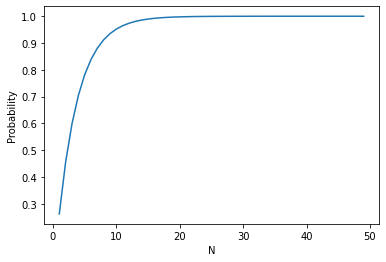

In [ ]:
p=0.737856
l=[]
o=[]
for i in range(1,50):
  l.append((1-pow(0.737856,i)))
  o.append(i)
plt.plot(o,l)
plt.xlabel('N')
plt.ylabel('Probability')

# **Question 2**

Zhang’s method

1. Use checkerboard images IMG5456.JPG - IMG5470.JPG and perform camera calibration using Zhang’s Method. For this part you can use inbuilt cv2 functions.

In [ ]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
w_point= np.zeros((8 * 6, 3), np.float32)
w_point[:,:2] = np.mgrid[0:8, 0:6].T.reshape(-1, 2)
w_point*=29
point3=[]
point2=[]
for i in range(5456,5471):
  img=mpimg.imread('../calibration-data/IMG_'+str(i)+'.JPG')
  ret, corners = cv2.findChessboardCorners(img,(8,6),flags=cv2.CALIB_CB_ADAPTIVE_THRESH+cv2.CALIB_CB_NORMALIZE_IMAGE+cv2.CALIB_CB_FAST_CHECK)
  if ret == True:
    point3.append(w_point)
    point2.append(corners)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(point3,point2, (img.shape[1],img.shape[0]), None, None)
print("Camera matrix : \n")
print(mtx)
print("Distortion Parameters : \n")
print(dist)
print("Rotation Vectors : \n")
print(rvecs)
print("Translation Vectors : \n")
print(tvecs)
print("Reprojection Error : \n")
print(ret)


Camera matrix : 

[[1.36622032e+04 0.00000000e+00 3.34147191e+03]
 [0.00000000e+00 1.36791121e+04 1.49292623e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Distortion Parameters : 

[[ 9.91603811e-02  1.00257689e+01 -1.54663325e-02  2.89461247e-02
  -1.62669570e+02]]
Rotation Vectors : 

[array([[-0.01391711],
       [-0.05168708],
       [-0.00317062]]), array([[-0.00722948],
       [ 0.22640623],
       [ 0.03528506]]), array([[-0.00933627],
       [-0.41653593],
       [-0.03574904]]), array([[ 0.01641086],
       [-0.61891699],
       [-0.07746111]]), array([[0.00401851],
       [0.30772971],
       [0.06544836]]), array([[-0.32580929],
       [-0.22341805],
       [-0.01737986]]), array([[-0.19207995],
       [-0.38532699],
       [-0.00383441]]), array([[ 0.24419738],
       [-0.32333155],
       [ 0.02480479]]), array([[0.31049163],
       [0.0659352 ],
       [0.07060155]]), array([[ 0.3493353 ],
       [-0.56432901],
       [-0.06015332]]), array([[ 0.22426718],
       

2. Using the estimated camera parameters compute the image points and overlay a wireframe over the actual image of chessboard using straight lines between the computed points. Refer to example-wireframe.png for reference. What do you observe about the overlay? Note that do not use the image points found using the cv2.findChessboardCorners for wireframe overlay. Size of each square on checkerboard 29mmX29mm.

In [ ]:
w_point= np.zeros((8 * 6, 4), np.float32)
w_point[:,:2] = np.mgrid[0:8, 0:6].T.reshape(-1, 2)
w_point.shape
w_point*=29
w_point[:,3]=1
p_point=[]
for j in range(15):
  p_point.append([])
j=0
for i in rvecs:
  tr=np.zeros([3,4])
  rot=np.zeros([3,3])
  rot=cv2.Rodrigues(i,rot)[0]
  tr[:,3]=tvecs[j][:,0]
  tr[0:3,0:3]=rot[0:3,0:3]
  P=mtx@tr
  P=P/P[2,3]
  for m in range(48):
    point_temp=P@(w_point[m,:].T)
    point_temp=point_temp/point_temp[2]
    p_point[j].append(point_temp) 
  j+=1
p_point=np.asarray(p_point)

In [ ]:
def draw_h(l,point):
  for i in range(8):
    j = i+8
    while j < 48:
      plt.plot([point[l][j-8][0],point[l][j][0]],[point[l][j-8][1],point[l][j][1]],'ro-')
      j+=8
def draw_v(l,point):
  val=7
  sum=0
  fact=1
  for i in range(point[l].shape[0]):
    if(i==(val*fact+sum)):
      sum+=1
      fact+=1
    else:
      plt.plot([point[l][i][0],point[l][i+1][0]],[point[l][i][1],point[l][i+1][1]],'ro-')

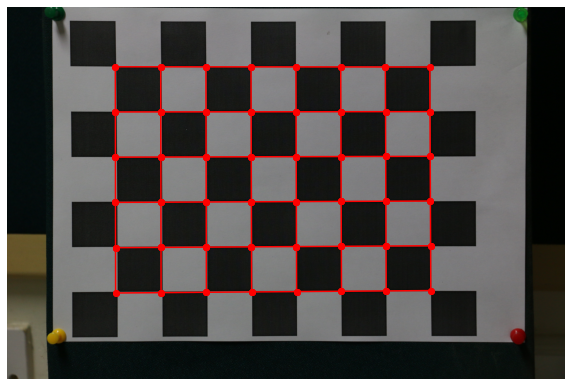

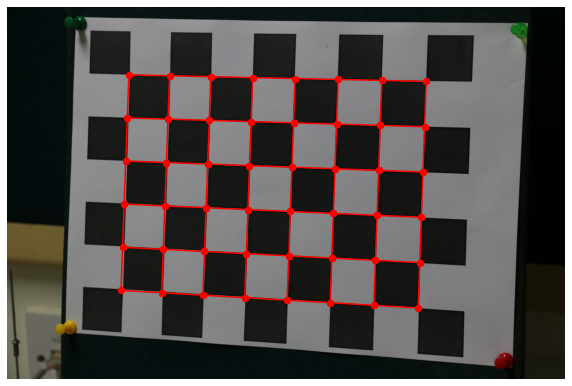

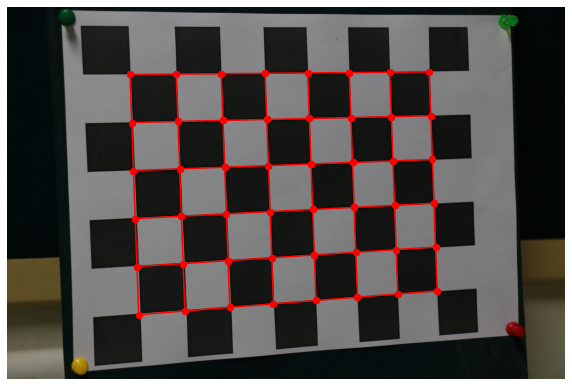

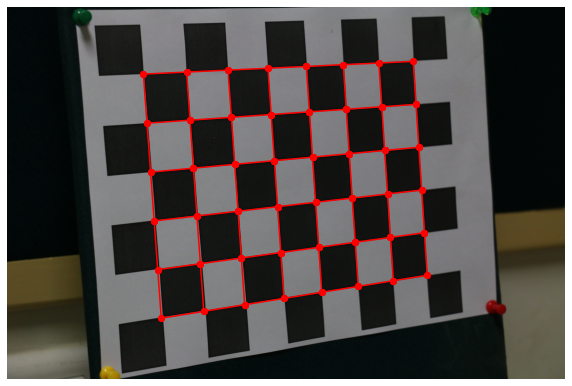

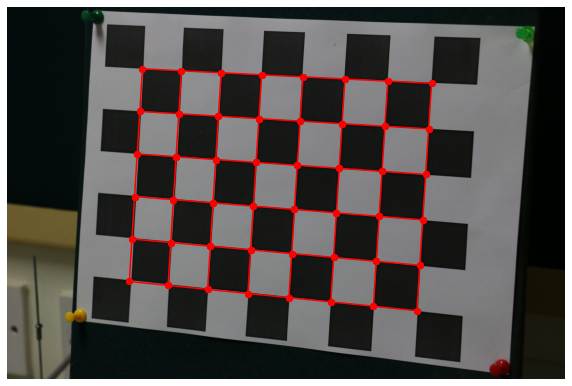

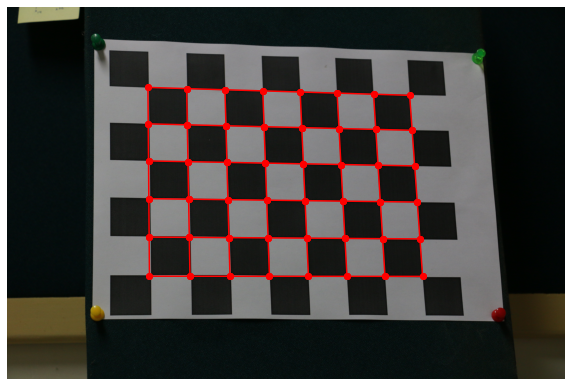

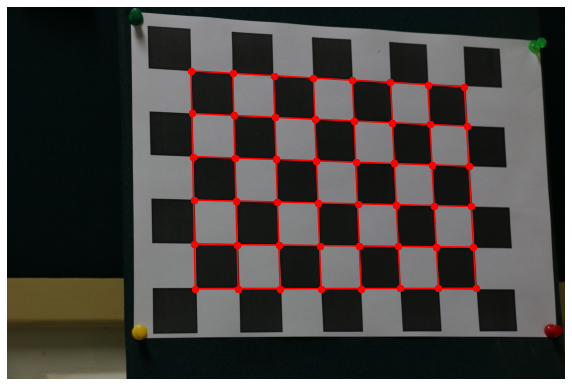

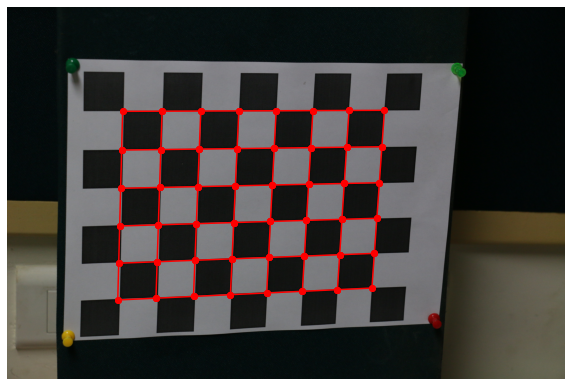

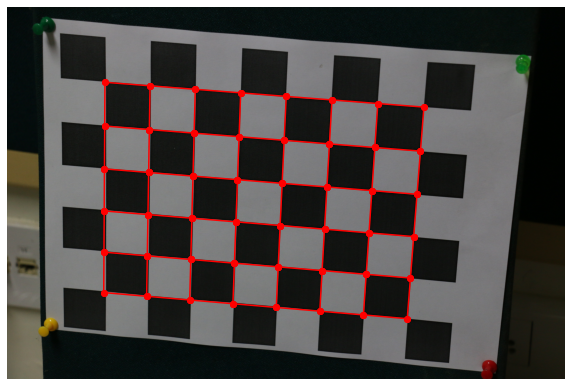

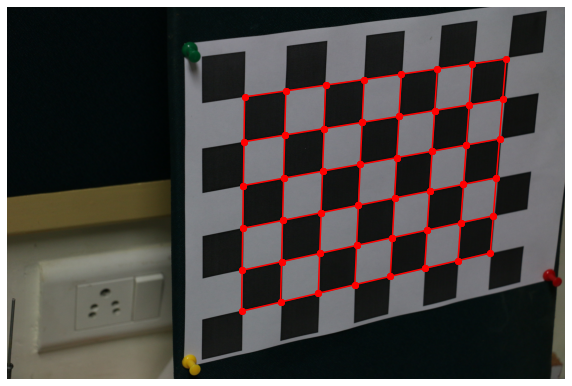

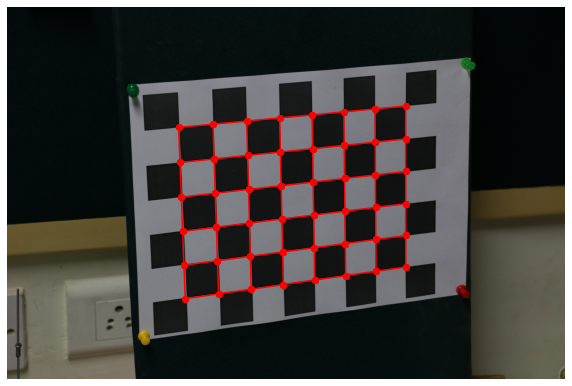

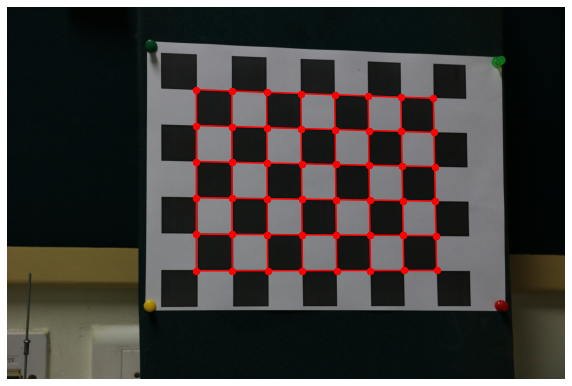

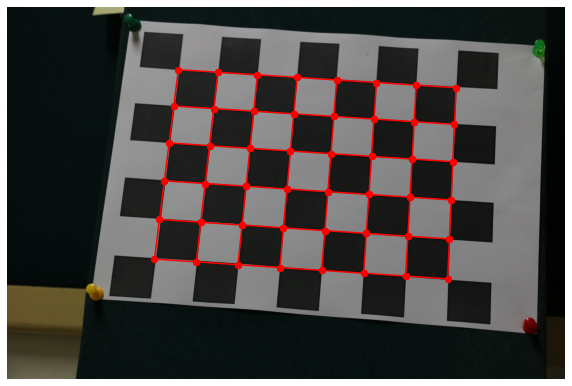

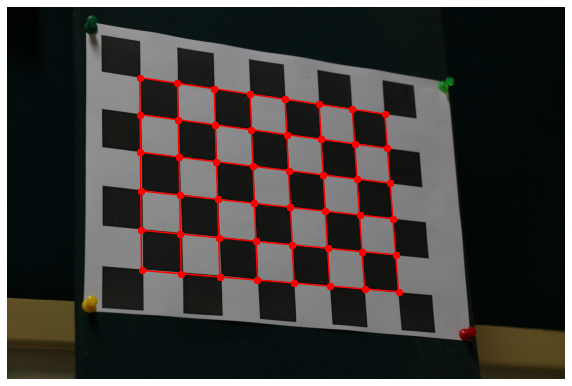

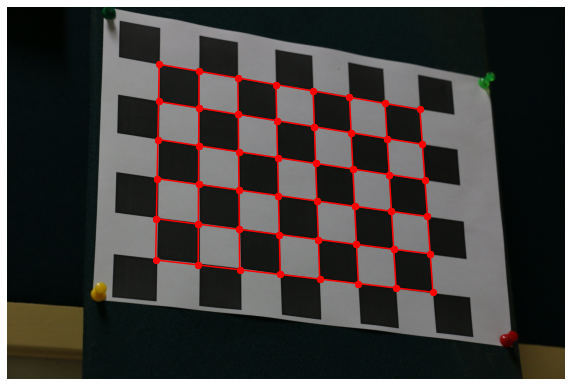

In [ ]:
for i in range(15):
  fig=plt.figure(figsize=(10,10))
  draw_h(i,p_point)
  draw_v(i,p_point)
  img = mpimg.imread('../calibration-data/IMG_'+str(5456 + i)+'.JPG')
  #fig.add_subplot(8,2, i+1)
  plt.imshow(img)
  plt.savefig('../images/IMG_'+str(5456 + i)+'_w.JPG')
  plt.axis('off')
  plt.show()

# **Question 3**

3. DIY

Perform the above DLT using the an image taken by your camera. Use a calibration
object for which you can measure the world co-ordinates.
Try the RANSAC based variant as well, for the same, and compare results.

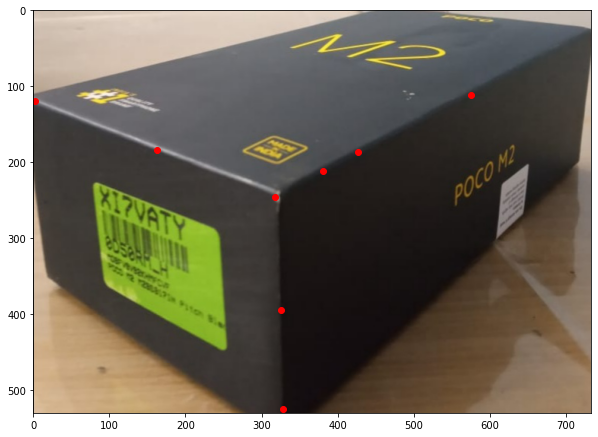

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random
img_point= np.array([[318,246],[381,211],[427,187],[576,112],[325,394],[328,525],[163,184],[2,120]])
img = mpimg.imread('../images/pic.jpeg')
plt.figure(figsize = [10,10])
imgplot = plt.imshow(img)
for i,j in img_point: 
  plt.plot(i,j,'ro')
plt.show()

In [ ]:
world_point=np.array([[0,0,0],[17,0,0],[34,0,0],[102,0,0],[0,0,34],[0,0,54],[0,5,10],[0,85,0]])

Perform these three experiments, report the projection matrix and reconstruction error, for both the above mentioned scales:

(a) Use original data points as input. Perform reconstruction on the original data points.

In [ ]:
def_point=img_point.shape[0]
A_mat=[]
for i in range(def_point):
  x=world_point[i][0]
  y=world_point[i][1]
  z=world_point[i][2]
  u=img_point[i][0]
  v=img_point[i][1]
  A_mat.append([x,y,z,1,0,0,0,0,-u*x,-u*y,-u*z,-u])
  A_mat.append([0,0,0,0,x,y,z,1,-v*x,-v*y,-v*z,-v])
A_mat=np.asarray(A_mat)
u,s,v=np.linalg.svd(A_mat)
P = v[-1,:]/v[-1,-1]
P = P.reshape(3,4)
one=np.ones([1,world_point.shape[0]])
x=np.concatenate((world_point.T,one))
x=np.dot(P,x)
x=x/x[2,:]
error=np.sqrt(np.mean(np.sum((x[0:2,:].T-img_point)**2,1)))
print("Reconstruction error: ",error)
print("Projection matrix\n",P)

Reconstruction error:  8.00485461320828
Projection matrix
 [[ 4.64163855e+00 -3.45486448e+00 -2.72725859e+00  3.24913332e+02]
 [-8.10823595e-01  1.89541949e+01  9.07992941e-01  2.38137632e+02]
 [ 3.78439802e-03  1.69635130e-01 -8.51636520e-03  1.00000000e+00]]


(b) Use normalized data points as input.
Perform reconstruction on the normalized data points (without denormalizing
the projection matrix obtained)

In [ ]:
def Normalization(X):
  m =np.mean(X,0)
  s= np.std(X)
  X=X.copy()
  if X.shape[1] == 2:
    xT=np.array([[s,0,m[0]],[0,s,m[1]],[0,0,1]])
  else:  
    xT=np.array([[s,0,0,m[0]],[0,s,0,m[1]],[0,0,s,m[2]],[0,0,0,1]])
  xT=np.linalg.inv(xT)
  X=np.dot(xT,np.concatenate((X.T,np.ones((1,X.shape[0])))))
  X =X[0:3,:].T
  return xT,X

In [ ]:
def_point=img_point.shape[0]
A_mat=[]
xT,world_point_n=Normalization(world_point)
yT,img_point_n=Normalization(img_point)
for i in range(def_point):
  x=world_point_n[i][0]
  y=world_point_n[i][1]
  z=world_point_n[i][2]
  u=img_point_n[i][0]
  v=img_point_n[i][1]
  A_mat.append([x,y,z,1,0,0,0,0,-u*x,-u*y,-u*z,-u])
  A_mat.append([0,0,0,0,x,y,z,1,-v*x,-v*y,-v*z,-v])
A_mat=np.asarray(A_mat)
u,s,v=np.linalg.svd(A_mat)
P = v[-1,:]/v[-1,-1]
P = P.reshape(3,4)
one=np.ones([1,world_point_n.shape[0]])
x=np.concatenate((world_point_n.T,one))
x=np.dot(P,x)
x=x/x[2,:]
x[0:2,:].T.shape
img_point_n.shape
error=np.sqrt(np.mean(np.sum((x[0:2,:].T-img_point_n[:,:-1])**2,1)))
print("Reconstruction error: ",error)
print("Projection matrix\n",P)

Reconstruction error:  0.048957661566982814
Projection matrix
 [[ 2.08357736e-01 -3.65730348e+00 -3.46513771e-03 -1.31756154e+00]
 [-1.05379301e-01 -1.47861554e+00  1.97583994e-01 -6.08107095e-01]
 [ 3.31723202e-02  1.65539985e+00 -7.31280626e-02  1.00000000e+00]]


(c) Use normalized data points as input.
Perform reconstruction on the original data points (with the denormalized projection matrix).

In [ ]:
def_point=img_point.shape[0]
A_mat=[]
xT,world_point_n=Normalization(world_point)
yT,img_point_n=Normalization(img_point)
for i in range(def_point):
  x=world_point_n[i][0]
  y=world_point_n[i][1]
  z=world_point_n[i][2]
  u=img_point_n[i][0]
  v=img_point_n[i][1]
  A_mat.append([x,y,z,1,0,0,0,0,-u*x,-u*y,-u*z,-u])
  A_mat.append([0,0,0,0,x,y,z,1,-v*x,-v*y,-v*z,-v])
A_mat=np.asarray(A_mat)
u,s,v=np.linalg.svd(A_mat)
P = v[-1,:]/v[-1,-1]
P = P.reshape(3,4)
P = np.dot(np.dot(np.linalg.pinv(yT), P),xT)
P = P / P[-1,-1]
one=np.ones([1,world_point.shape[0]])
x=np.concatenate((world_point.T,one))
x=np.dot(P,x)
x=x/x[2,:]
x[0:2,:].T.shape
img_point_n.shape
error=np.sqrt(np.mean(np.sum((x[0:2,:].T-img_point)**2,1)))
print("Reconstruction error: ",error)
print("Projection matrix\n",P)

Reconstruction error:  7.412443370004404
Projection matrix
 [[ 4.49324107e+00 -3.45412716e+00 -2.52074893e+00  3.26257171e+02]
 [-8.29084125e-01  1.98615600e+01  1.26521002e+00  2.37328279e+02]
 [ 3.54920048e-03  1.77115918e-01 -7.82417851e-03  1.00000000e+00]]


2. Decompose the projection matrix obtained for the main experiment above and
report:
(a) camera matrix (K)
(b) rotation matrix (R)
(c) projection center (C)
Notice that upon QR decomposition to obtain K and R, the obtained K matrix
might have positive diagonal elements. This indicates a positive camera constant,
while we usually assume it to be negative in theory as it becomes easier to handle
signs. To fix this we use the following method:
K
0
= KR(z, π) and R
0
= R(z, π)R
Be sure to fix the matrices using this method. Show how the decomposition still
holds true with these transformed matrices.

In [ ]:
def_point=img_point.shape[0]
A_mat=[]
for i in range(def_point):
  x=world_point[i][0]
  y=world_point[i][1]
  z=world_point[i][2]
  u=img_point[i][0]
  v=img_point[i][1]
  A_mat.append([x,y,z,1,0,0,0,0,-u*x,-u*y,-u*z,-u])
  A_mat.append([0,0,0,0,x,y,z,1,-v*x,-v*y,-v*z,-v])
A_mat=np.asarray(A_mat)
u,s,v=np.linalg.svd(A_mat)
P = v[-1,:]/v[-1,-1]
P = P.reshape(3,4)
one=np.ones([1,world_point.shape[0]])
x=np.concatenate((world_point.T,one))
x=np.dot(P,x)
x=x/x[2,:]
tmp= P[:,3]*-1
tmp1=P[:,0:3]
p=np.linalg.pinv(tmp1)
C=np.dot(p,tmp)
R,K=np.linalg.qr(tmp1)
error=np.sqrt(np.mean(np.sum((x[0:2,:].T-img_point)**2,1)))
print("Reconstruction error: ",error)
print("Projection matrix\n",P)
print("camera matrix (K)\n",K)
print("Rotation matrix (R)\n",R)
print("Projection center (C)\n",C)

Reconstruction error:  8.00485461320828
Projection matrix
 [[ 4.64163855e+00 -3.45486448e+00 -2.72725859e+00  3.24913332e+02]
 [-8.10823595e-01  1.89541949e+01  9.07992941e-01  2.38137632e+02]
 [ 3.78439802e-03  1.69635130e-01 -8.51636520e-03  1.00000000e+00]]
camera matrix (K)
 [[-4.71192717e+00  6.66480986e+00  2.84282894e+00]
 [ 0.00000000e+00 -1.80777952e+01 -4.25064279e-01]
 [ 0.00000000e+00  0.00000000e+00 -1.03481301e-02]]
Rotation matrix (R)
 [[-9.85082830e-01 -1.72063310e-01 -2.45681266e-03]
 [ 1.72078974e-01 -9.85038335e-01 -9.39713260e-03]
 [-8.03152910e-04 -9.67971977e-03  9.99952828e-01]]
Projection center (C)
 [-194.12621587  -11.44243144 -196.7610802 ]


3. (a) Implement the RANSAC based variant of the above calibration method and
report your observations for main experiment.

In [ ]:
def DLT(world_point,img_point):
  def_point=img_point.shape[0]
  A_mat=[]
  xT,world_point_n=Normalization(world_point)
  yT,img_point_n=Normalization(img_point)
  for i in range(def_point):
    x=world_point_n[i][0]
    y=world_point_n[i][1]
    z=world_point_n[i][2]
    u=img_point_n[i][0]
    v=img_point_n[i][1]
    A_mat.append([x,y,z,1,0,0,0,0,-u*x,-u*y,-u*z,-u])
    A_mat.append([0,0,0,0,x,y,z,1,-v*x,-v*y,-v*z,-v])
  A_mat=np.asarray(A_mat)
  u,s,v=np.linalg.svd(A_mat)
  P = v[-1,:]/v[-1,-1]
  P = P.reshape(3,4)
  P = np.dot(np.dot(np.linalg.pinv(yT), P),xT)
  P = P / P[-1,-1]
  one=np.ones([1,world_point.shape[0]])
  x=np.concatenate((world_point.T,one))
  x=np.dot(P,x)
  x=x/x[2,:]
  x[0:2,:].T.shape
  img_point_n.shape
  tmp= P[:,3]*-1
  tmp1=P[:,0:3]
  p=np.linalg.pinv(tmp1)
  C=np.dot(p,tmp)
  R,K=np.linalg.qr(tmp1)
  error=np.sqrt(np.mean(np.sum((x[0:2,:].T-img_point)**2,1)))
  return P,error,C,R,K

In [ ]:
min_ = -1
best_w=0
best_i=0
best_P=0
best_C=0
best_K=0
best_R=0
for i in range(50):
  rand_p=random.sample(range(7),6)
  new_w=[]
  new_i=[]
  for j in rand_p:
    new_w.append(world_point[j])
    new_i.append(img_point[j])
  new_w=np.array(new_w)
  new_i=np.array(new_i)
  P,error,C,R,K=DLT(new_w,new_i)
  if(min_==-1):
    min_=error
    best_w=new_w
    best_i=new_i
    best_P=P
    best_C=C
    best_K=K
    best_R=R
  elif min_>error:
    min_=error
    best_w=new_w
    best_i=new_i
    best_P=P
    best_C=C
    best_K=K
    best_R=R
  print("Reconstruction error: ",error)
print("Projection matrix\n",best_P)
print("camera matrix (K)\n",K)
print("Rotation matrix (R)\n",R)
print("Projection center (C)\n",C)

Reconstruction error:  2.279895944427409
Reconstruction error:  5.695140050829185
Reconstruction error:  5.953368404146265
Reconstruction error:  2.9244539547158235
Reconstruction error:  7.4534632253672966
Reconstruction error:  77.10128731922322
Reconstruction error:  4.738748995482793
Reconstruction error:  9.405093547634792
Reconstruction error:  25.509585598342525
Reconstruction error:  4.307975287724926
Reconstruction error:  75.53956103042862
Reconstruction error:  119.0684403948115
Reconstruction error:  97.78888305372736
Reconstruction error:  12.311993282214482
Reconstruction error:  9.64275948096848
Reconstruction error:  8.701442821818777
Reconstruction error:  224.06408745134493
Reconstruction error:  3.9281824953268965
Reconstruction error:  11.844757110850804
Reconstruction error:  2.6762579124586026
Reconstruction error:  61.60127350647504
Reconstruction error:  5.407333278278617
Reconstruction error:  73.65397214762305
Reconstruction error:  314.6185413193814
Reconstru

# **Question 1**

Scale of each chessblock = 2800x2800mm

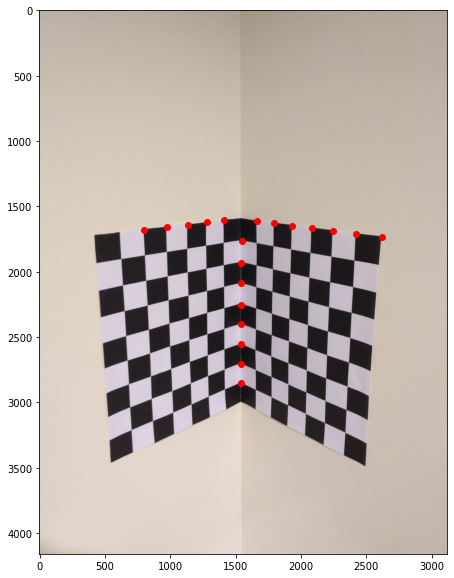

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random
img_point= np.array([[1663,1614],[1794,1630],[1932,1648],[2083,1666],[2247,1687],[2421,1710],[2619,1733],[1546,1764],[1545,1931],[1544,2089],[1543,2252],[1543,2403],[1545,2557],[1545,2706],[1545,2853],[1410,1608],[1281,1624],[1134,1642],[975,1660],[800,1678]])
img = mpimg.imread('../calibration-data/calib-object.jpg')
plt.figure(figsize = [10,10])
imgplot = plt.imshow(img)
for i,j in img_point: 
  plt.plot(i,j,'ro')
plt.show()

In [ ]:
w=2800
world_point= np.array([[w,0,0],[w*2,0,0],[w*3,0,0],[w*4,0,0],[w*5,0,0],[w*6,0,0],[w*7,0,0],[0,w,0],[0,w*2,0],[0,w*3,0],[0,w*4,0],[0,w*5,0],[0,w*6,0],[0,w*7,0],[0,w*8,0],[0,0,w],[0,0,w*2],[0,0,w*3],[0,0,w*4],[0,0,w*5]])

(a) Use original data points as input.
Perform reconstruction on the original data points. (main experiment)

In [ ]:
def_point=img_point.shape[0]
A_mat=[]
for i in range(def_point):
  x=world_point[i][0]
  y=world_point[i][1]
  z=world_point[i][2]
  u=img_point[i][0]
  v=img_point[i][1]
  A_mat.append([x,y,z,1,0,0,0,0,-u*x,-u*y,-u*z,-u])
  A_mat.append([0,0,0,0,x,y,z,1,-v*x,-v*y,-v*z,-v])
A_mat=np.asarray(A_mat)
u,s,v=np.linalg.svd(A_mat)
P = v[-1,:]/v[-1,-1]
P = P.reshape(3,4)
one=np.ones([1,world_point.shape[0]])
x=np.concatenate((world_point.T,one))
x=np.dot(P,x)
x=x/x[2,:]
error=np.sqrt(np.mean(np.sum((x[0:2,:].T-img_point)**2,1)))
print("Reconstruction error: ",error)
print("Projection matrix\n",P)

Reconstruction error:  2.2878474483428786
Projection matrix
 [[ 2.25308748e-02  5.70020337e-03 -6.29642642e-02  1.54285936e+03]
 [-1.43724264e-02  6.64128233e-02 -1.51419000e-02  1.59684199e+03]
 [-1.23363609e-05  3.62582720e-06 -1.24707020e-05  1.00000000e+00]]


(b) Use normalized data points as input.
Perform reconstruction on the normalized data points (without denormalizing
the projection matrix obtained)

In [ ]:
def Normalization(X):
  m =np.mean(X,0)
  s= np.std(X)
  X=X.copy()
  if X.shape[1] == 2:
    xT=np.array([[s,0,m[0]],[0,s,m[1]],[0,0,1]])
  else:  
    xT=np.array([[s,0,0,m[0]],[0,s,0,m[1]],[0,0,s,m[2]],[0,0,0,1]])
  xT=np.linalg.inv(xT)
  X=np.dot(xT,np.concatenate((X.T,np.ones((1,X.shape[0])))))
  X =X[0:3,:].T
  return xT,X

In [ ]:
def_point=img_point.shape[0]
A_mat=[]
xT,world_point_n=Normalization(world_point)
yT,img_point_n=Normalization(img_point)
for i in range(def_point):
  x=world_point_n[i][0]
  y=world_point_n[i][1]
  z=world_point_n[i][2]
  u=img_point_n[i][0]
  v=img_point_n[i][1]
  A_mat.append([x,y,z,1,0,0,0,0,-u*x,-u*y,-u*z,-u])
  A_mat.append([0,0,0,0,x,y,z,1,-v*x,-v*y,-v*z,-v])
A_mat=np.asarray(A_mat)
u,s,v=np.linalg.svd(A_mat)
P = v[-1,:]/v[-1,-1]
P = P.reshape(3,4)
one=np.ones([1,world_point_n.shape[0]])
x=np.concatenate((world_point_n.T,one))
x=np.dot(P,x)
x=x/x[2,:]
x[0:2,:].T.shape
img_point_n.shape
error=np.sqrt(np.mean(np.sum((x[0:2,:].T-img_point_n[:,:-1])**2,1)))
print("Reconstruction error: ",error)
print("Projection matrix\n",P)

Reconstruction error:  0.005166631044136151
Projection matrix
 [[ 0.63411103 -0.00344054 -0.63214841 -0.03835502]
 [ 0.13879944  0.88258627  0.13115876  0.06906968]
 [-0.08110562  0.02392317 -0.08187038  1.        ]]


(c) Use normalized data points as input.
Perform reconstruction on the original data points (with the denormalized pro-
jection matrix).

In [ ]:
def_point=img_point.shape[0]
A_mat=[]
xT,world_point_n=Normalization(world_point)
yT,img_point_n=Normalization(img_point)
for i in range(def_point):
  x=world_point_n[i][0]
  y=world_point_n[i][1]
  z=world_point_n[i][2]
  u=img_point_n[i][0]
  v=img_point_n[i][1]
  A_mat.append([x,y,z,1,0,0,0,0,-u*x,-u*y,-u*z,-u])
  A_mat.append([0,0,0,0,x,y,z,1,-v*x,-v*y,-v*z,-v])
A_mat=np.asarray(A_mat)
u,s,v=np.linalg.svd(A_mat)
P = v[-1,:]/v[-1,-1]
P = P.reshape(3,4)
P = np.dot(np.dot(np.linalg.pinv(yT), P),xT)
P = P / P[-1,-1]
one=np.ones([1,world_point.shape[0]])
x=np.concatenate((world_point.T,one))
x=np.dot(P,x)
x=x/x[2,:]
x[0:2,:].T.shape
img_point_n.shape
error=np.sqrt(np.mean(np.sum((x[0:2,:].T-img_point)**2,1)))
print("Reconstruction error: ",error)
print("Projection matrix\n",P)

Reconstruction error:  2.2892585834884542
Projection matrix
 [[ 2.25453542e-02  5.71747097e-03 -6.29421457e-02  1.54285915e+03]
 [-1.43584665e-02  6.64455160e-02 -1.50967036e-02  1.59679047e+03]
 [-1.23303733e-05  3.63700537e-06 -1.24466383e-05  1.00000000e+00]]


2.Decompose the projection matrix obtained for the main experiment above and
report:
(a) camera matrix (K)
(b) rotation matrix (R)
(c) projection center (C)
Notice that upon QR decomposition to obtain K and R, the obtained K matrix
might have positive diagonal elements. This indicates a positive camera constant,
while we usually assume it to be negative in theory as it becomes easier to handle
signs. To fix this we use the following method:
0
0
K = KR(z, π) and R = R(z, π)R
Be sure to fix the matrices using this method. Show how the decomposition still
holds true with these transformed matrices.

In [ ]:
def_point=img_point.shape[0]
A_mat=[]
for i in range(def_point):
  x=world_point[i][0]
  y=world_point[i][1]
  z=world_point[i][2]
  u=img_point[i][0]
  v=img_point[i][1]
  A_mat.append([x,y,z,1,0,0,0,0,-u*x,-u*y,-u*z,-u])
  A_mat.append([0,0,0,0,x,y,z,1,-v*x,-v*y,-v*z,-v])
A_mat=np.asarray(A_mat)
u,s,v=np.linalg.svd(A_mat)
P = v[-1,:]/v[-1,-1]
P = P.reshape(3,4)
one=np.ones([1,world_point.shape[0]])
x=np.concatenate((world_point.T,one))
x=np.dot(P,x)
x=x/x[2,:]
tmp= P[:,3]*-1
tmp1=P[:,0:3]
p=np.linalg.pinv(tmp1)
C=np.dot(p,tmp)
R,K=np.linalg.qr(tmp1)
error=np.sqrt(np.mean(np.sum((x[0:2,:].T-img_point)**2,1)))
print("Reconstruction error: ",error)
print("Projection matrix\n",P)
print("camera matrix (K)\n",K)
print("Rotation matrix (R)\n",R)
print("Projection center (C)\n",C)

Reconstruction error:  2.2878474483428786
Projection matrix
 [[ 2.25308748e-02  5.70020337e-03 -6.29642642e-02  1.54285936e+03]
 [-1.43724264e-02  6.64128233e-02 -1.51419000e-02  1.59684199e+03]
 [-1.23363609e-05  3.62582720e-06 -1.24707020e-05  1.00000000e+00]]
camera matrix (K)
 [[-2.67246537e-02  3.09108923e-02  4.49403002e-02]
 [ 0.00000000e+00 -5.90565167e-02  4.66277122e-02]
 [ 0.00000000e+00  0.00000000e+00 -4.16186584e-05]]
Rotation matrix (R)
 [[-8.43074530e-01 -5.37796523e-01  4.86091147e-04]
 [ 5.37796545e-01 -8.43074651e-01 -9.63164165e-05]
 [ 4.61609758e-04  1.80216222e-04  9.99999877e-01]]
Projection center (C)
 [40361.67163721 -6565.3181496  38352.22275902]


3. (a) Implement the RANSAC based variant of the above calibration method and
report your observations for main experiment.

In [ ]:
def DLT(world_point,img_point):
  def_point=img_point.shape[0]
  A_mat=[]
  xT,world_point_n=Normalization(world_point)
  yT,img_point_n=Normalization(img_point)
  for i in range(def_point):
    x=world_point_n[i][0]
    y=world_point_n[i][1]
    z=world_point_n[i][2]
    u=img_point_n[i][0]
    v=img_point_n[i][1]
    A_mat.append([x,y,z,1,0,0,0,0,-u*x,-u*y,-u*z,-u])
    A_mat.append([0,0,0,0,x,y,z,1,-v*x,-v*y,-v*z,-v])
  A_mat=np.asarray(A_mat)
  u,s,v=np.linalg.svd(A_mat)
  P = v[-1,:]/v[-1,-1]
  P = P.reshape(3,4)
  P = np.dot(np.dot(np.linalg.pinv(yT), P),xT)
  P = P / P[-1,-1]
  one=np.ones([1,world_point.shape[0]])
  x=np.concatenate((world_point.T,one))
  x=np.dot(P,x)
  x=x/x[2,:]
  x[0:2,:].T.shape
  img_point_n.shape
  tmp= P[:,3]*-1
  tmp1=P[:,0:3]
  p=np.linalg.pinv(tmp1)
  C=np.dot(p,tmp)
  R,K=np.linalg.qr(tmp1)
  error=np.sqrt(np.mean(np.sum((x[0:2,:].T-img_point)**2,1)))
  return P,error,C,R,K

In [ ]:
min_ = -1
best_w=0
best_i=0
best_P=0
best_C=0
best_K=0
best_R=0
for i in range(50):
  rand_p=random.sample(range(19),12)
  new_w=[]
  new_i=[]
  for j in rand_p:
    new_w.append(world_point[j])
    new_i.append(img_point[j])
  new_w=np.array(new_w)
  new_i=np.array(new_i)
  P,error,C,R,K=DLT(new_w,new_i)
  if(min_==-1):
    min_=error
    best_w=new_w
    best_i=new_i
    best_P=P
    best_C=C
    best_K=K
    best_R=R
  elif min_>error:
    min_=error
    best_w=new_w
    best_i=new_i
    best_P=P
    best_C=C
    best_K=K
    best_R=R
  print("Reconstruction error: ",error)
print("Projection matrix\n",best_P)
print("camera matrix (K)\n",K)
print("Rotation matrix (R)\n",R)
print("Projection center (C)\n",C)

Reconstruction error:  195.98135975788946
Reconstruction error:  2.3018848072940177
Reconstruction error:  2.0196295703548857
Reconstruction error:  1.416150512442218
Reconstruction error:  1.679065336111924
Reconstruction error:  1.396080069844996
Reconstruction error:  1.7632107319036037
Reconstruction error:  1.0555950425569374
Reconstruction error:  1.8093778487284098
Reconstruction error:  2.3060678406637622
Reconstruction error:  2.270128544340487
Reconstruction error:  1.5751383239556562
Reconstruction error:  1.8174504932264117
Reconstruction error:  2.1803176987407333
Reconstruction error:  2.2415555603705526
Reconstruction error:  1.3093685846329892
Reconstruction error:  1.7031420540775164
Reconstruction error:  1.681654643626158
Reconstruction error:  1.661915079264366
Reconstruction error:  1.9989418731902597
Reconstruction error:  1.4643740646128995
Reconstruction error:  2.1030643040829533
Reconstruction error:  1.171794073483832
Reconstruction error:  1.7341954571139007